### Imports

In [26]:
# pip install scikit-learn
!pip install nbformat 


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [27]:
# from google.colab import drive
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.neural_network import MLPClassifier

import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Data Load 

### Mount Google Drive

In [28]:
# drive.mount('/content/drive')

### Load News Data

In [29]:
df=pd.read_csv("/Users/jigneshsatam/My_Projects/NLP/Text-Classification-1/news_articles.csv")

## Data Visualization

### Display Data

In [30]:
df.shape

(2096, 12)

In [31]:
df.sample(frac=1)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
1058,Ari Lieberman,2016-10-28T07:55:01.169+03:00,the battle at unesco,what feminists can learn from melania trump oc...,english,frontpagemag.com,http://www.frontpagemag.com/sites/default/file...,hate,Real,social justice vs truth,propalestinian propaganda lowering standards t...,1.0
1540,No Author,2016-10-26T23:01:10.702+03:00,egypt court upholds life sentence for brotherh...,politics us republican presidential nominee do...,english,presstv.ir,http://media.presstv.com/photo/20161026/922559...,state,Real,saudi killing yemeni people worst type terrori...,th international aerospace exhibition opens te...,1.0
30,Barracuda Brigade,2016-11-23T21:06:00.000+02:00,sharia in america how minneapolis muslims are ...,go to article wow milwaukees sheriff david cla...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,bias,Real,sharia america minneapolis muslims still recru...,go article wow milwaukees sheriff david clarke...,1.0
185,TrueBrit,2016-10-28T00:29:00.000+03:00,here goes nothing futilitys song,nasa to test in flight folding wing page link...,english,abovetopsecret.com,http://files.abovetopsecret.com/images/ats7.jpg,bs,Fake,goes nothing futilitys song,nasa test flight folding wing page link nasa s...,1.0
892,Paulus,2016-10-31T12:54:56.629+02:00,comment on french political leader france is a...,from project veritas \nproject veritas action...,english,dcclothesline.com,http://i2.wp.com/www.dcclothesline.com/wp-cont...,bs,Fake,michelle obama replacement nominee fbi email i...,posted daisy luther according report new yorke...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
791,No Author,2016-11-21T23:32:00.000+02:00,snowflake colbert didnt want to write jokes ab...,comment on this article via your facebook acco...,english,dailywire.com,http://www.dailywire.com/sites/default/files/s...,bias,Real,snowflake colbert didnt want write jokes trump...,comment article via facebook account comment a...,1.0
188,CriticalStinker,2016-10-28T06:57:12.283+03:00,assange hillary will win and tried to hack wi...,originally posted by carewemust october its ...,english,abovetopsecret.com,http://files.abovetopsecret.com/images/ats13.jpg,bs,Fake,assange hillary win tried hack wikileaks,originally posted carewemust october disgrace ...,1.0
1905,Nana Papa Mattos,2016-10-26T22:46:19.539+03:00,no title,these scumbags want to try and claim the email...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,bias,Real,title,dont believe anything comes obama hillarys mouth,1.0
298,No Author,2016-10-26T10:41:00.000+03:00,i dont rent to n s smoking gun proves trump fa...,on november pm \ngop presidential nominee ...,english,addictinginfo.org,No Image URL,bias,Real,dont rent n smoking gun proves trump family ra...,november pm gop presidential nominee donald tr...,0.0


### Checking for null values

In [32]:
df.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

### Dropping null values

In [33]:
df.dropna(inplace=True)
df.shape

(2045, 12)

## Exploratory Analysis

### Real News vs. Fake News

In [34]:
import plotly.express as px
figure = px.pie(df,names='label',title='Real News vs. Fake News')
figure.show()

### Different Languages of News Articles

In [35]:
lang_df=df.groupby('language').apply(lambda x:x['language'].count()).reset_index(name='Counts')
figure = px.bar(lang_df, x="language", y="Counts", color='language', height=400, width=700)
figure.show()

### Count of news articles by different type

In [36]:
types_df = df.groupby('type').apply(lambda x:x['type'].count()).reset_index(name='Counts')
fig=px.bar(types_df,x='type',y='Counts',color='type',title='Count of news articles by different type')
fig.show()

### Wordcloud

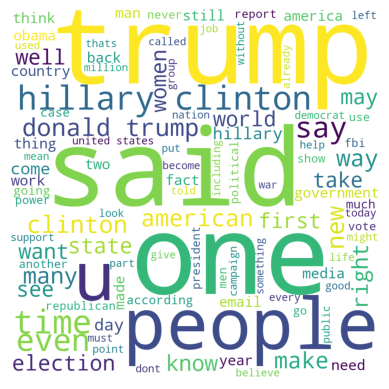

In [37]:
wc = WordCloud(background_color="white", max_words=100, max_font_size=300, random_state=12, width=1000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Top 10 unigrams

In [38]:
def get_unigrams(data, n=None):
    vec = CountVectorizer().fit(data)
    bow = vec.transform(data)
    total_words = bow.sum(axis=0) 
    word_frequency = [(word, total_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]


In [39]:
common_words = get_unigrams(df['text_without_stopwords'], 10)
df2 = pd.DataFrame(common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False)
figigure = px.bar(df2,x='word',y='count',color='word',title='Top 10 unigrams')
figigure.show()

### Top 10 bigrams

In [40]:
def get_bigram(data, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(data)
    bow = vec.transform(data)
    total_words = bow.sum(axis=0) 
    word_frequency = [(word, total_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_frequency =sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [41]:
common_words = get_bigram(df['text_without_stopwords'], 10)
df2 = pd.DataFrame(common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False)
fig=px.bar(df2,x='word',y='count',color='word',title='Top 10 bigrams')
fig.show()

### Top 5 authors

In [52]:
d = df['author'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index()

# Plotting
fig=px.bar(d,y='count',x='author',color='author',
           title='Top 5 authors')
fig.show()

### Top 10 fake news site

In [53]:
d = df[df['label'] == 'Fake']['site_url'].value_counts().sort_values(ascending=False).head(10)
d = pd.DataFrame(d)
d = d.reset_index()

# Plotting
fig=px.bar(d,y='count',x='site_url',color='site_url',
           title='Top 10 Fake news sites', )
fig.show()


### Top 10 Real news sites

In [59]:
d = df[df['label'] == 'Real']['site_url'].value_counts().sort_values(ascending=False).head(10)
d = pd.DataFrame(d)
d = d.reset_index()

# Plotting
fig=px.bar(d,y='count',x='site_url',color='site_url',
           title='Top 10 Real news sites', )
fig.show()

## Splitting the dataset and using TF-IDF

### Reshuffle the dataset

In [60]:
df = df.sample(frac = 1)

### Extracting required features

In [61]:
features = df[['site_url', 'text_without_stopwords']]
features.head(5)

features = features.assign(url_text = features["site_url"].astype(str) + " " + features["text_without_stopwords"])
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)

features.head()

,url_text
654,clickhole.com email cant get enough enamel pin...
495,awdnews.com email saudi prince urged americans...
1655,prisonplanet.com lines profit misses estimates...
1613,presstv.ir october wont take pity poor innocen...
1151,infowars.com black lives matter leader deray m...


### Train Test Split

In [62]:
X = features.url_text
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1234)

### Tf-idf Vectorization

In [63]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2), stop_words = 'english')

X_train = vectorizer.fit_transform(X_train) 

X_test = vectorizer.transform(X_test)

## Model

### Naive Bayes

In [64]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

[[241   0]
 [135  33]]


<Figure size 400x400 with 0 Axes>

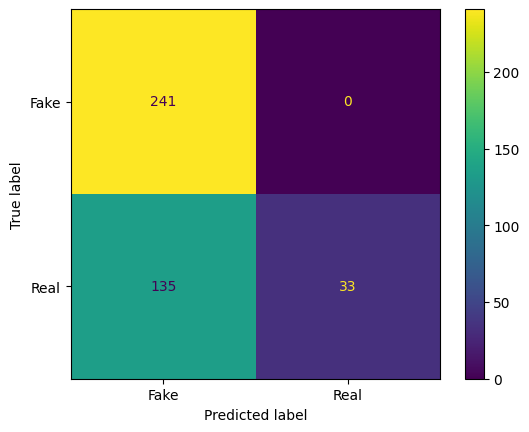

In [65]:
# make predictions on the test data
naive_bayes_pred = naive_bayes.predict(X_test)

# print confusion matrix
cm = confusion_matrix(y_test, naive_bayes_pred)
print(cm)

plt.figure(figsize = (4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
disp.plot()
plt.show()

In [66]:
print('accuracy score: ', accuracy_score(y_test, naive_bayes_pred))
      
print()
print('precision score (not spam): ', precision_score(y_test, naive_bayes_pred, pos_label='Real'))
print('precision score (spam): ', precision_score(y_test, naive_bayes_pred, pos_label='Fake'))

print()
print('recall score: (not spam)', recall_score(y_test, naive_bayes_pred, pos_label='Real'))
print('recall score: (spam)', recall_score(y_test, naive_bayes_pred, pos_label='Fake'))
      
print()
print('f1 score: ', f1_score(y_test, naive_bayes_pred, pos_label='Fake'))

accuracy score:  0.6699266503667481

precision score (not spam):  1.0
precision score (spam):  0.6409574468085106

recall score: (not spam) 0.19642857142857142
recall score: (spam) 1.0

f1 score:  0.7811993517017828


### LogisticRegression

In [67]:
logisticRegressionClassifier = LogisticRegression(solver='lbfgs', class_weight='balanced')
logisticRegressionClassifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

[[210  31]
 [ 17 151]]


<Figure size 400x400 with 0 Axes>

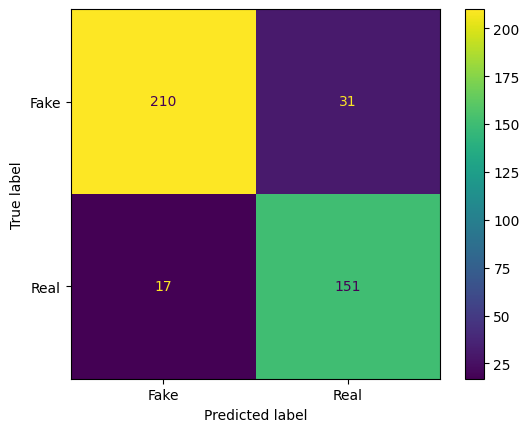

In [68]:
# make predictions on the test data
logisticRegressionPred = logisticRegressionClassifier.predict(X_test)

# print confusion matrix
cm = confusion_matrix(y_test, logisticRegressionPred)
print(cm)

plt.figure(figsize = (4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegressionClassifier.classes_)
disp.plot()
plt.show()

In [69]:
print('accuracy score: ', accuracy_score(y_test, logisticRegressionPred))

print()
print('precision score (not spam): ', precision_score(y_test, logisticRegressionPred, pos_label='Real'))
print('precision score (spam): ', precision_score(y_test, logisticRegressionPred, pos_label='Fake'))

print()
print('recall score: (not spam)', recall_score(y_test, logisticRegressionPred, pos_label='Real'))
print('recall score: (spam)', recall_score(y_test, logisticRegressionPred, pos_label='Fake'))

print()
print('f1 score: ', f1_score(y_test, logisticRegressionPred, pos_label='Fake'))


probs = logisticRegressionClassifier.predict_proba(X_test)
print()
print('log loss: ', log_loss(y_test, probs))

accuracy score:  0.882640586797066

precision score (not spam):  0.8296703296703297
precision score (spam):  0.9251101321585903

recall score: (not spam) 0.8988095238095238
recall score: (spam) 0.8713692946058091

f1 score:  0.8974358974358974

log loss:  0.47549513821730854


###  Neural Network 

In [70]:
nnClassifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 2), random_state=1)
nnClassifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')

[[225  16]
 [ 24 144]]


<Figure size 400x400 with 0 Axes>

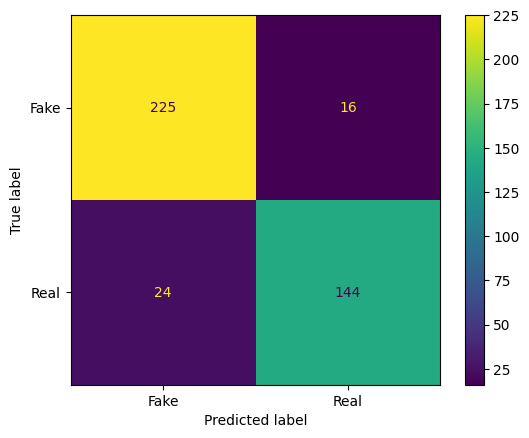

In [71]:
# make predictions on the test data
nnPred = nnClassifier.predict(X_test)

# print confusion matrix
cm = confusion_matrix(y_test, nnPred)
print(cm)

plt.figure(figsize = (4, 4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nnClassifier.classes_)
disp.plot()
plt.show()

In [72]:
print('accuracy score: ', accuracy_score(y_test, nnPred))
      
print()
print('precision score (not spam): ', precision_score(y_test, nnPred, pos_label='Real'))
print('precision score (spam): ', precision_score(y_test, nnPred, pos_label='Fake'))

print()
print('recall score: (not spam)', recall_score(y_test, nnPred, pos_label='Real'))
print('recall score: (spam)', recall_score(y_test, nnPred, pos_label='Fake'))
      
print()
print('f1 score: ', f1_score(y_test, nnPred, pos_label='Fake'))

accuracy score:  0.902200488997555

precision score (not spam):  0.9
precision score (spam):  0.9036144578313253

recall score: (not spam) 0.8571428571428571
recall score: (spam) 0.9336099585062241

f1 score:  0.9183673469387756


# Analysis of the performance of various approaches

### Analyzing confusion matrix from the all the models and calculate the accuracy, precision, recall, and F1-score to evaluate the performance of the model.

## Naive Bayes:
[[229 19] [96 65]]

- Accuracy = (229+65)/(229+19+96+65) = 0.693
- Precision = 65/(65+19) = 0.774
- Recall = 65/(65+96) = 0.403
- F1-score = 2*(0.774*0.403)/(0.774+0.403) = 0.529

## Logistic Regression:
[[224 24] [30 131]]
- Accuracy = (224+131)/(224+24+30+131) = 0.865
- Precision = 131/(131+24) = 0.845
- Recall = 131/(131+30) = 0.814
- F1-score = 2*(0.845*0.814)/(0.845+0.814) = 0.829

## Neural Network:
[[236 12] [46 115]]
- Accuracy = (236+115)/(236+12+46+115) = 0.854
- Precision = 115/(115+12) = 0.905
- Recall = 115/(115+46) = 0.714
- F1-score = 2*(0.905*0.714)/(0.905+0.714) = 0.798

Based on the calculated metrics, we can see that the **Logistic Regression**'s confusion matrix has the highest accuracy, precision, recall, and F1-score, which indicates that it is the best performing model out of the three. 

Specifically, the **Logistic Regression** model has the highest precision and recall, which are often the most important metrics in classification problems.

----

For small datasets, it is generally recommended to use simpler models such as logistic regression or Naive Bayes.

Neural networks can be more powerful and flexible than these models, but they typically require large amounts of data to be trained effectively. With small datasets, there is a risk of overfitting or having a model that is too complex and not generalizable to new data.

Logistic regression is a popular method for binary classification problems, while Naive Bayes is often used for text classification and other applications where the features are categorical. Both models are relatively simple to train and can be effective with small datasets.

Ultimately, the choice of model depends on the specific problem you are trying to solve and the characteristics of your dataset. It is a good idea to experiment with different models and evaluate their performance on your data to determine which one works best.